In [28]:
# Importing libraries and cleaned data.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("notebook")
df = pd.read_csv('data/data_clean.csv')

In [40]:
pair = [
    'price', 'sqft_living', 'sqft_lot', 'sqft_basement', 'population',
    'density'
]
box = [
    'bedrooms', 'bathrooms', 'floors', 'grade', 'view', 'condition',
    'waterfront', 'greenbelt', 'nuisance'
]
cats = ['zipcode', 'yr_built', 'yr_last_construction']
all_feats = ['price', 'sqft_living', 'sqft_lot', 'sqft_basement', 'population',
          'density', 'bedrooms', 'bathrooms', 'floors', 'grade', 'view',
          'condition', 'waterfront', 'greenbelt', 'nuisance', 'zipcode',
          'yr_built', 'yr_last_construction']

In [46]:
def corr_price(df):
    feats = ['price', 'sqft_living', 'sqft_lot', 'sqft_basement', 'population',
          'density', 'bedrooms', 'bathrooms', 'floors', 'grade', 'view',
          'condition', 'waterfront', 'greenbelt', 'nuisance', 'zipcode',
          'yr_built', 'yr_last_construction']
    return df[feats].corr().abs()['price'].sort_values(ascending=False)
corr_price(df)

price                   1.000000
sqft_living             0.648437
grade                   0.630134
bathrooms               0.352476
bedrooms                0.349908
view                    0.274509
floors                  0.238458
sqft_basement           0.234725
sqft_lot                0.144563
yr_last_construction    0.130727
density                 0.101846
greenbelt               0.100047
yr_built                0.088082
waterfront              0.079482
zipcode                 0.076691
population              0.050242
nuisance                0.021521
condition               0.017645
Name: price, dtype: float64

## Visuals

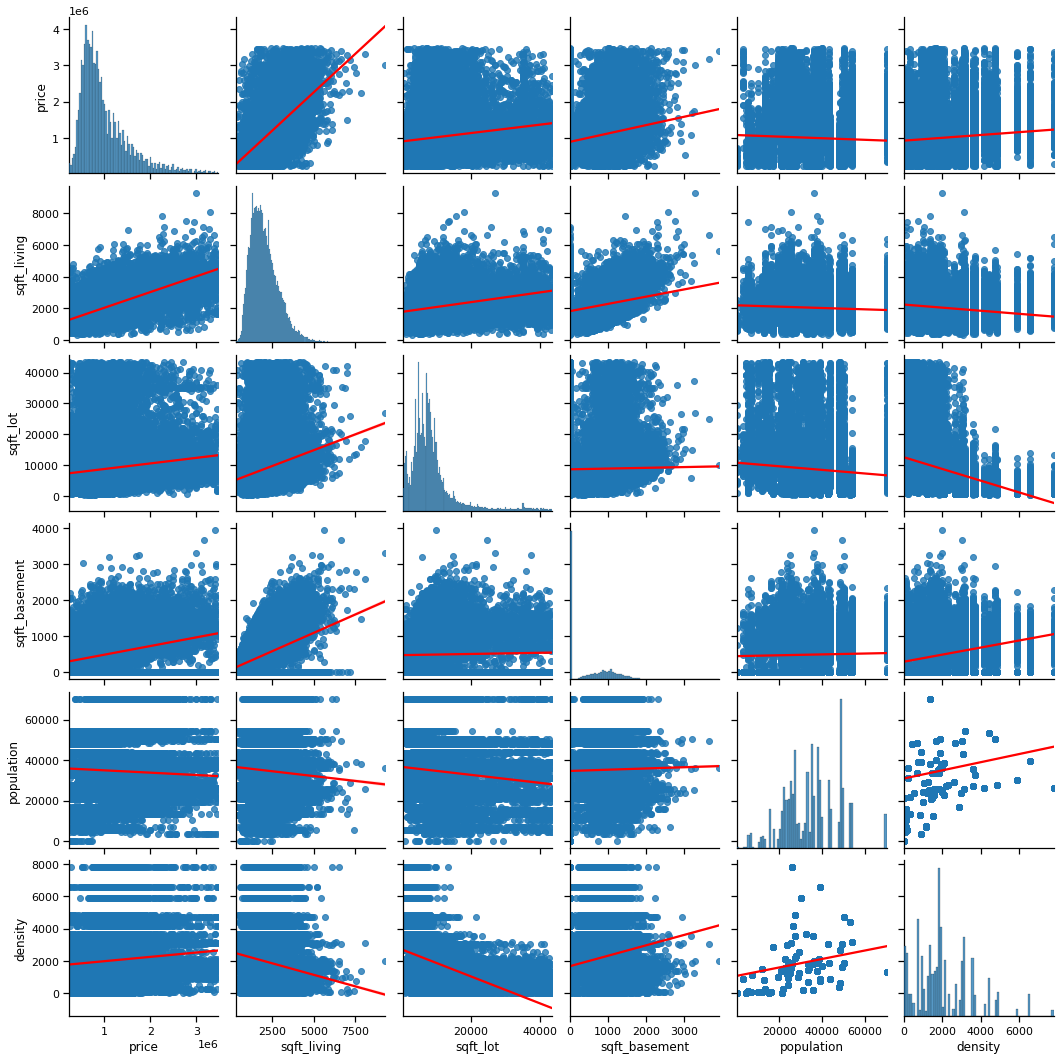

In [47]:
# Visualizing numerical data with a pairplot
def pair_viz(df):
    pair = ['price', 'sqft_living', 'sqft_lot', 'sqft_basement', 'population','density']
    sns.pairplot(data=df[pair], kind='reg', plot_kws={'line_kws':{'color':'red'}})
    plt.show;
pair_viz(df)

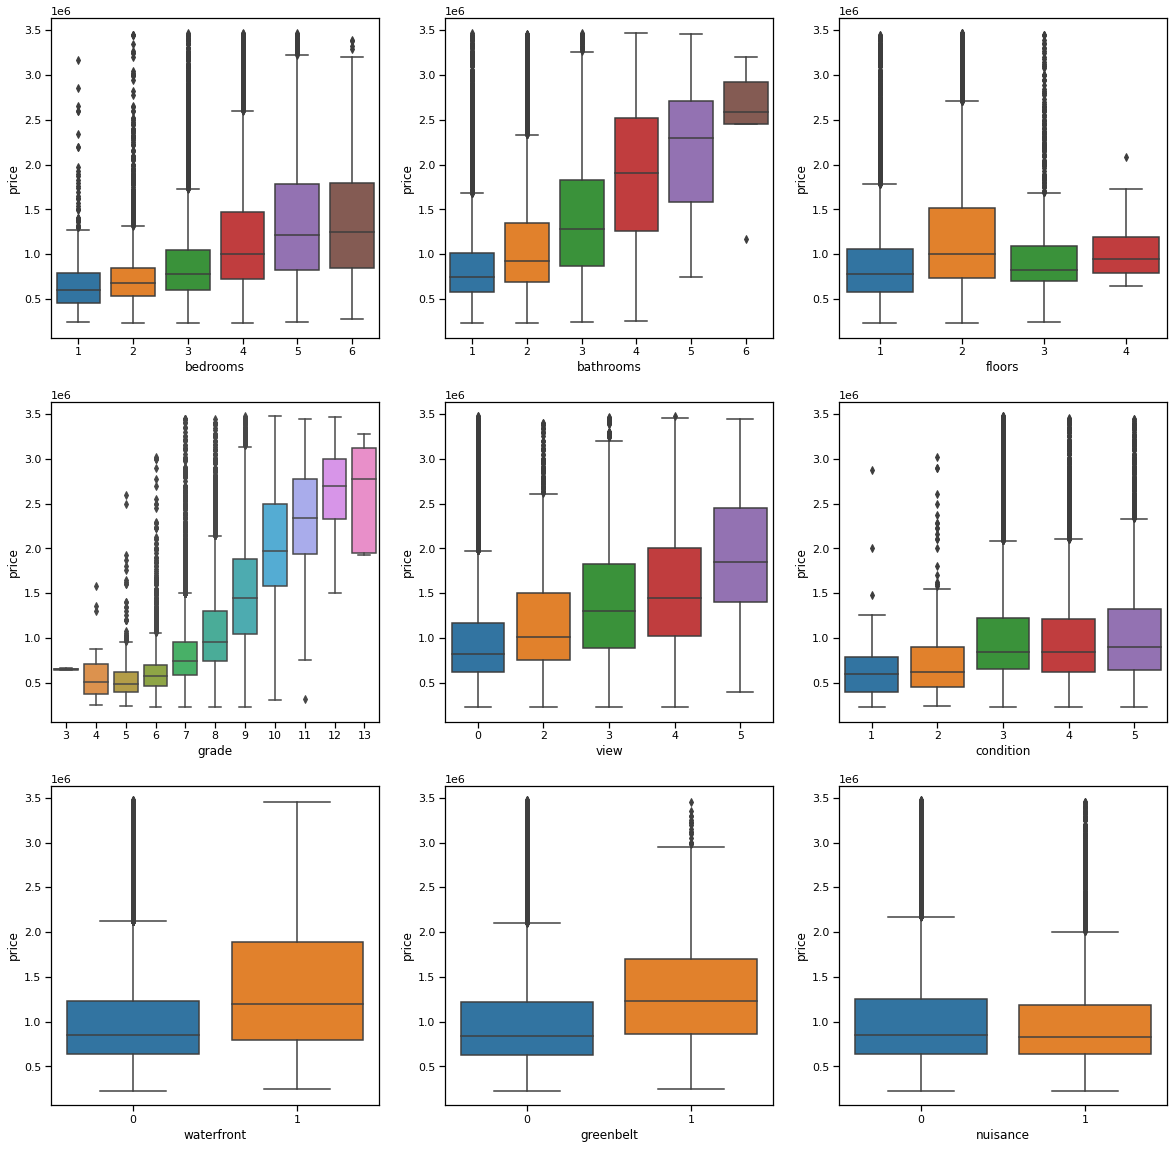

In [48]:
# Visualizing categorical data with box plots.
def box_viz(df):
    box = ['bedrooms', 'bathrooms', 'floors', 'grade', 'view', 'condition','waterfront', 'greenbelt', 'nuisance']
    fig, ax = plt.subplots(3, 3, figsize=[20, 20])
    for i, j in enumerate(box):
        col = i % 3
        row = i // 3
        axis = ax[row][col]
        sns.boxplot(data=df, y='price', x=j, ax=axis)
    plt.show()
box_viz(df)

# Correlations

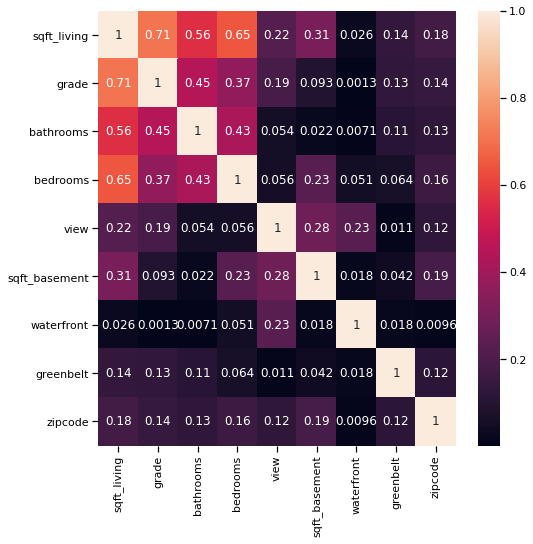

In [50]:
# Making a heatmap to visualize correlations between variables.
def heat_viz(df):
    heat = ['sqft_living','grade','bathrooms','bedrooms','view','sqft_basement','waterfront','greenbelt','zipcode']
    fig, ax = plt.subplots(figsize=(8,8))
    sns.heatmap(df[heat].corr().abs(), annot=True, ax=ax)
    plt.show();
heat_viz(df)

Based on the correlations, I decided to include `sqft_living`, `bathrooms`, `bedrooms`, `view`,  `floors`,  `sqft_basement` as predictors of `price`. I excluded `grade` as its correlation with `sqft_living` is greater than 0.7 and is less correlated with `price`.

Based on the visual, I decided to include `waterfront` and `greenbelt`. 

Lastly, I decided to include `zipcode`, to account for changes in price based on location of the property.

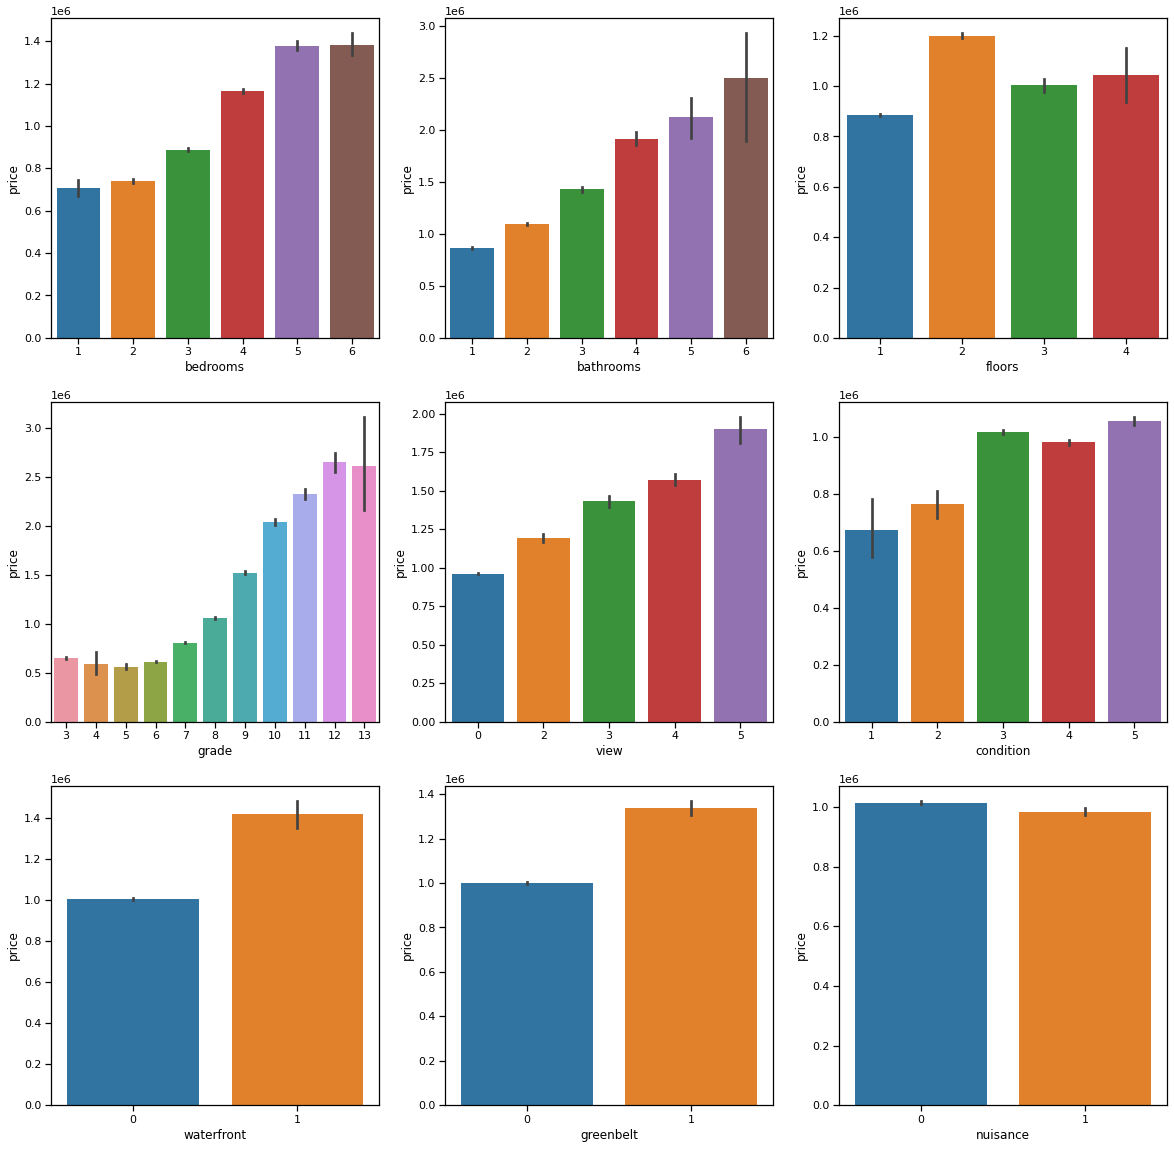

In [37]:
# Visualizing categorical data with barcharts
fig,ax=plt.subplots(3,3,figsize=[20,20])
for i,j in enumerate(barbox):
    col = i%3
    row = i//3
    axis = ax[row][col]
    sns.barplot(data=df, y='price', x=j, ax=axis)

# Based on the below graphs, the following variables appear to be correlated with 
# price and will be selected for modeling: waterfront, greenbelt, view, zipcode

In [13]:
# Looking for multicollinearity by sorting pair-wise correlations between numerical variables.  
corr_df = df[pair[1:]+barbox].corr().abs().stack().reset_index().sort_values(0, ascending=False)
corr_df.index = list(zip(corr_df.level_0, corr_df.level_1))
corr_df.drop(columns=['level_1', 'level_0'], inplace = True)
corr_df.rename(columns={0:'corr'},inplace=True)
corr_df = corr_df[corr_df['corr'].between(.5,.99)]
corr_df.drop_duplicates(subset=['corr'],inplace=True)
corr_df
# Since sqft_living and grade have a correlation above 0.7, I will not include both in my model
# to avoid multicollinearity. Since sqft_living is more correlated with price, we will drop grade.

,corr
"(yr_built, yr_last_construction)",0.896408
"(grade, sqft_living)",0.708051
"(sqft_living, bedrooms)",0.648588
"(yr_built, floors)",0.597563
"(floors, yr_last_construction)",0.595929
"(bathrooms, sqft_living)",0.560905
